In [1]:
%matplotlib inline

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
# Input: Pa gene expression data from ArrayExpress (matrix: sample x gene)
# Data compression method: None
# Output: Original Pa gene expression data projected onto t-SNE dimensions 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(123)

In [3]:
# load arguments
data_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/data/all-pseudomonas-gene.pcl'
map_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/metadata/mapping_sampleID_medium.txt'

In [4]:
# read in data
data = pd.read_table(data_file, header = 0, sep = '\t', index_col = 0)
data = pd.DataFrame(data)
X = data.transpose()
X.head(5)

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
0.1_12hr_CSV86(Pae_G1a).CEL,7.838544,8.497065,7.307553,5.702930,5.916741,8.063651,7.886661,7.727567,6.892924,7.342850,...,7.072203,7.999211,8.198070,9.263671,7.543691,7.660837,7.939869,8.036795,7.422011,6.363520
0.1_2hr_CSV86(Pae_G1a).CEL,6.875033,6.776369,7.817901,7.785099,6.341328,8.819276,7.044294,6.209714,8.125990,6.579754,...,7.071695,8.125990,7.778503,8.144801,6.022443,7.066444,6.132326,7.254421,7.765065,6.449344
0.1_6hr_CSV86(Pae_G1a).CEL,7.842026,7.655701,7.677886,6.166077,6.871341,7.265597,7.113404,7.480186,6.930921,6.778917,...,6.098874,7.950371,6.434071,6.918956,6.844293,7.291937,7.427901,9.331491,7.098162,7.954667
0.1_7hr_CSV86(Pae_G1a).CEL,7.684676,8.201883,7.013697,7.005081,7.962038,8.061572,7.971468,7.638721,7.254758,4.959658,...,7.007845,6.760074,5.774510,7.288419,7.292321,7.118397,7.525591,7.329594,7.544611,7.192988
0.1_9hr_CSV86(Pae_G1a).CEL,6.685037,7.105100,8.192931,7.092900,7.989745,7.740668,8.214360,7.383215,6.933628,7.122736,...,6.410715,7.536854,5.792362,8.339486,6.536239,6.517288,6.991313,7.735386,7.375440,6.052557


In [5]:
# Plot distribution of genes
# Values are normalized log2 transformed gene expression per gene (i.e. capture differential expression per gene)
#plt.hist(X['PA5570'])

In [6]:
# tSNE
tsne = TSNE(n_components=2, init='pca', random_state=123, perplexity=30, learning_rate=300, n_iter=400)
tsne_X = tsne.fit_transform(X)
tsne_X

array([[ 36.10401917, -26.8763752 ],
       [ 38.96501923, -25.48161697],
       [ 39.54830933, -25.93088531],
       ..., 
       [ -1.34091437,  28.7027092 ],
       [-21.26383018,  -7.8461194 ],
       [-21.53139687,  -7.8284173 ]], dtype=float32)

In [7]:
# Map sample id to clinial phenotype (i.e. experimental condition)

# Note:
# According to the source (https://github.com/scikit-learn/scikit-learn/blob/14031f6/sklearn/decomposition/pca.py#L310),
# input will be transformed by np.array() before doing PCA. So row index will be lost during 
# PCA.fit_transform(X) even using a structured array or a pandas DataFrame. However, the order of the data is preserved, 
# meaning you can attach the index back afterward
X_ann = pd.DataFrame(tsne_X, index=X.index, columns=['tsne1', 'tsne2'])

# read in mapping file (sample id -- phenotype)
map = pd.read_table(map_file, header = 0, sep = '\t', index_col = 0)

# Join 
X_new = pd.merge(X_ann, map, left_index=True, right_index=True)
X_new.head(5)

,tsne1,tsne2,medium
0.1_12hr_CSV86(Pae_G1a).CEL,36.104019,-26.876375,Mineral salt medium (MSM)
0.1_2hr_CSV86(Pae_G1a).CEL,38.965019,-25.481617,Mineral salt medium (MSM)
0.1_6hr_CSV86(Pae_G1a).CEL,39.548309,-25.930885,Mineral salt medium (MSM)
0.1_7hr_CSV86(Pae_G1a).CEL,39.765396,-24.935545,Mineral salt medium (MSM)
0.1_9hr_CSV86(Pae_G1a).CEL,37.536797,-25.606245,Mineral salt medium (MSM)


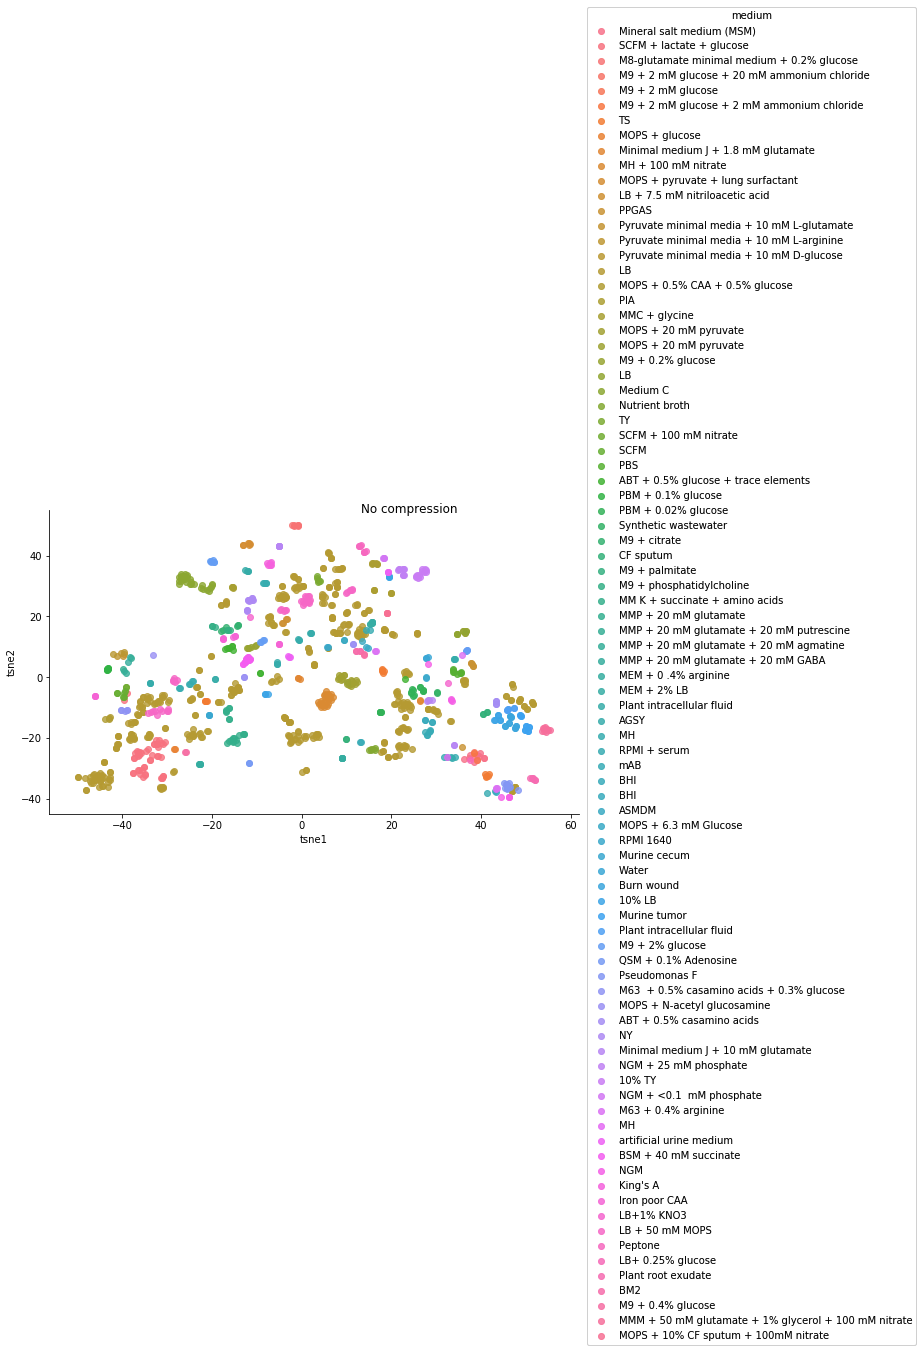

In [8]:
# Plot
# Note: t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.
fg = sns.lmplot(x = 'tsne1', y = 'tsne2', data = X_new, hue = 'medium', fit_reg = False)
fg.add_legend()
fig_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/viz/all_dim.png'
fg.fig.suptitle('No compression')
fg.savefig(fig_file)

#fg = sns.FacetGrid(data=X_new, hue='medium', aspect=1.61)
#fg.map(plt.scatter, 'tsne1', 'tsne2')
#fg.add_legend()
#legend_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/output/all_dim_legend.png'
#fig_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/output/all_dim.png'
#fg.savefig(fig_file)
#fg.savefig(legend_file)